# Using AI For Trading


In this tuturial, we will see how we can use AI techniques to train agent to trade stock. We will focus and two different techniques : Genetic Algorithm and Deep Q-Learning. We will compare our results with some basic trading strategy using trading indicators.

## The Trading Environment


First, we will need a trading environment. To simplify the problem, in our environment we can only perform one trade at a time. Let's see how to create a new trading environment.

In [1]:
from load_data import load_data
from trading_env import TradingEnv

# loading the data from csv file
test_data = load_data("SPY_test")

# creating our new environment
test_env = TradingEnv(data=test_data, stock_name="SP&500", starting_capital=1000, state_length=50)

You can notice that we first load data from a csv file. We supply data for the SP&500 and Apple stock price but you can easily add new data by downloading a csv historical data file from yahoo finance and add it to the /data file. Then, we create our trading environment with a starting capital of 1000$ and a state window of 50 (which means we see only the last 50 prices of the stock). 
Let's print our environement !

In [2]:
# print the last 50 prices of the stock
print(test_env)

[[268.769989 270.470001 271.609985 273.420013 273.920013 274.540009
  274.119995 276.119995 277.920013 276.970001 279.609985 279.140015
  280.410004 282.690002 283.290009 283.179993 283.299988 286.579987
  284.679993 281.76001  281.899994 281.579987 275.450012 263.929993
  269.130005 267.670013 257.630005 261.5      265.339996 266.
  269.589996 273.029999 273.109985 271.399994 270.049988 270.399994
  274.709991 277.899994 274.429993 271.649994 267.700012 269.079987
  272.190002 272.880005 272.779999 274.100006 278.869995 278.519989
  276.720001 275.299988]]


In [3]:
#print the entire data with aditional informations
print(test_env.get_all_data().head())

         date        open        high         low       close   adj close  \
0  2018-01-02  267.839996  268.809998  267.399994  268.769989  252.457245   
1  2018-01-03  268.959991  270.640015  268.959991  270.470001  254.054001   
2  2018-01-04  271.200012  272.160004  270.540009  271.609985  255.124817   
3  2018-01-05  272.510010  273.559998  271.950012  273.420013  256.825012   
4  2018-01-08  273.309998  274.100006  272.980011  273.920013  257.294708   

     volume  action  holdings    cash   money  returns  
0  86655700       0       0.0  1000.0  1000.0      0.0  
1  90070400       0       0.0  1000.0  1000.0      0.0  
2  80636400       0       0.0  1000.0  1000.0      0.0  
3  83524000       0       0.0  1000.0  1000.0      0.0  
4  57319200       0       0.0  1000.0  1000.0      0.0  


Now, let's begin to trade, we will simply perform random action and we will see how it goes.

 [WARNING] you can not perform this action. Choose between 0 to HOLD, 2 to SOLD
 [WARNING] you can not perform this action. Choose between 0 to HOLD, or 1 to BUY
 Cumulative returns: -0.0608564753415302


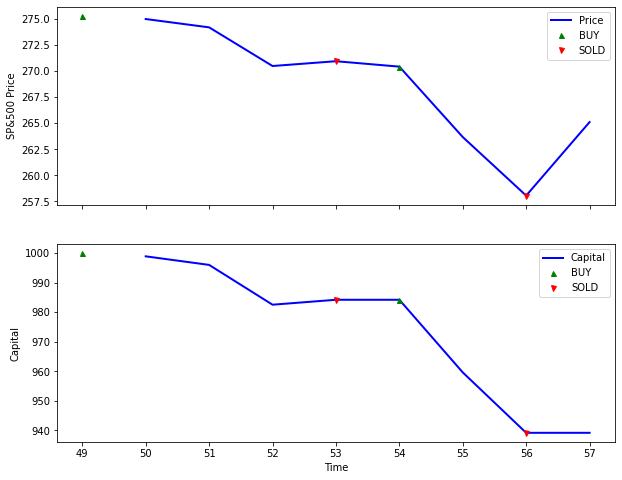

In [4]:
import random
done = 0
state = test_env.reset()
step = 0
# we will run for 10 steps (each step correspond to one trading day)
while done == 0 and step < 10:
    
    # choose random action 
    action = random.choice(test_env.get_possible_actions())
    
    # perform the action
    state, reward, done, info = test_env.step(action)
    
    # update our step variable
    step += 1

# plot graph to summarize 
print(f"\033[95m Cumulative returns: {test_env.get_cum_return()}")
test_env.render()

Like we can see above, some action were forbidden (we can only perform one trade at a time, so if we buy, we need to sell before buying again). Thus, we receive some warning messages. The render method plots graph which are very usefull to visualize our progression.

### Trading Agents

Let's see if we can manage to do better than random by using some basic trading strategy. 

In [5]:
# defining a function to play one full trading simulation
def trade(agent, env):
    done = 0
    state = env.reset()
    while done == 0:
    
        # choose action 
        action = agent.get_action(state)
    
        # perform the action
        state, reward, done, info = env.step(action)
    
    # plot graph to summarize
    print(f"\033[95m Cumulative returns: {env.get_cum_return()}")
    env.render()
    

#### Buy & Hold Agent

The Buy & hold agent is the simplest agent (but really difficult to beat). Like his name suggests, he just buys and wait to see how the stock market evolve.

 Cumulative returns: 0.3580821696221794


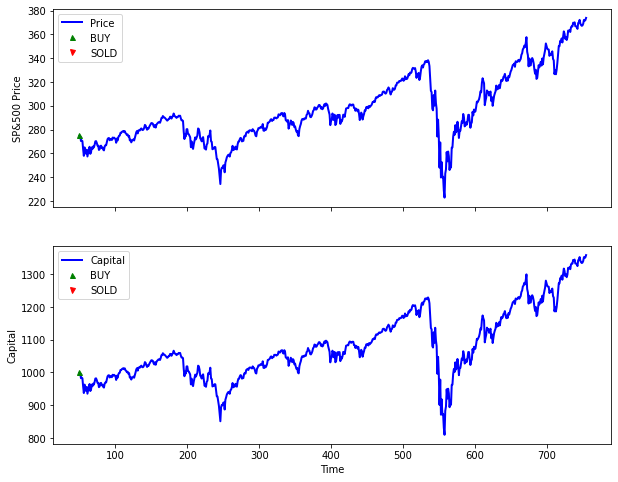

In [6]:
from agents import BHAgent
agent = BHAgent()
trade(agent, test_env)

#### RSI Agent

The relative strength index (RSI) is a technical indicator used in the analysis of financial markets. It is intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period.
The RSI is most typically used on a 14-day timeframe, measured on a scale from 0 to 100, with high and low levels marked at 70 and 30, respectively.

 Cumulative returns: 0.21506324062556065


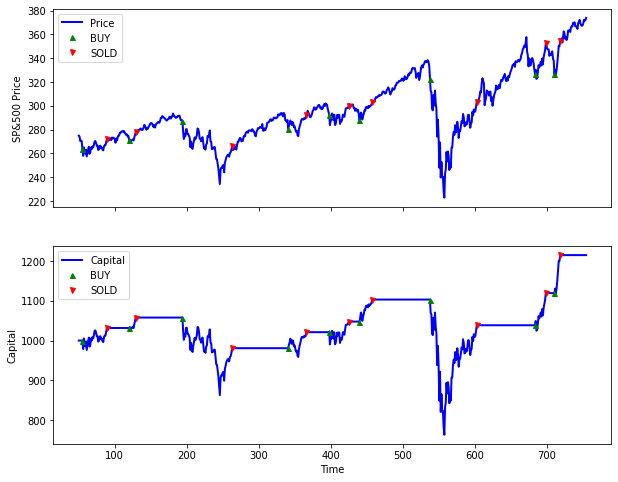

In [7]:
from agents import RSIAgent
# used with default parameters
agent = RSIAgent(period=14, low_threshold=30, high_threshold=70)
trade(agent, test_env)

#### MACD Agent

The Moving Average Convergence Divergence indicator is a collection of three time series calculated from historical price data, most often the closing price. These three series are: the MACD series proper, the "signal", and the "divergence" series which is the difference between the two. The MACD series is the difference between a "fast" (short period) exponential moving average (EMA), and a "slow" (longer period) EMA of the price series. The signal series is an EMA of the MACD series itself.

 Cumulative returns: 0.3702991168205351


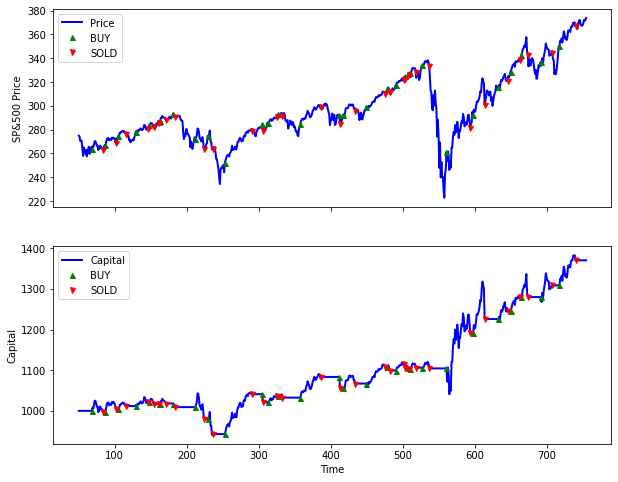

In [8]:
from agents import MACDAgent
# used with default parameters
agent = MACDAgent(s_period=12, l_period=26, signal_period=9)
trade(agent, test_env)

#### RSI & MACD Mix Agent
We can even try to mix RSI and MACD techniques. This technique has a total of six parameters ( 3 for RSI and 3 for MACD). 

 Cumulative returns: 0.0


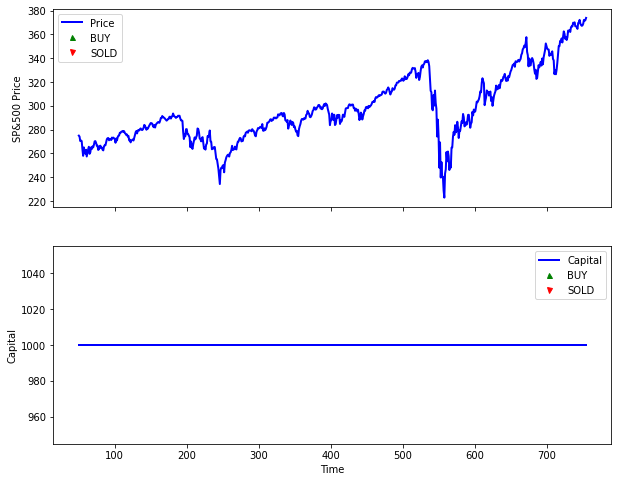

In [9]:
from agents import RSI_MACD_Agent
# used with default parameters
agent = RSI_MACD_Agent(rsi_window=14, rsi_low=30, rsi_high=70, macd_short=12, macd_long=26, macd_signal=9)
trade(agent, test_env)


### Using Genetic Algorithm To Optimize Trading Strategy
The parameters of the above strategies are not always perfectly adjusted. To find the best set of parameters for the SP&500 stock market we will use genetic algorithm. Let's first create a new environment ( with new data of the same stock) that we will use for twerking the parameters.

In [10]:
# loading the training data
training_data = load_data("SPY_train")

# creating the training environment
training_env = TradingEnv(data=training_data, stock_name="SP&500")


Now let's use genetic algorithm to find the best agent with the best set of parameters. This will be very long to run.

In [ ]:
from GeneticAlgo import gen_algo,  init_population_macd, init_population_rsi, init_population_rsi_macd
     
# for the RSI strategy
best_rsi = gen_algo(training_env, num_generations=30, pop_size=50, num_parents=25, num_params=3,
                           agent_constructor=RSIAgent, init_pop=init_population_rsi, num_mutations=1, max_params_value=50)
    
training_env.reset() # reset the environment to restart
    
# for the MACD strategy
best_macd = gen_algo(training_env, num_generations=30, pop_size=50, num_parents=25, num_params=3,
                           agent_constructor=MACDAgent, init_pop=init_population_macd, num_mutations=1, max_params_value=50)
    
training_env.reset() # reset the environment to restart
    
# for the mix strategy
best_mix = gen_algo(training_env, num_generations=30, pop_size=50, num_parents=25, num_params=6,
                           agent_constructor=RSI_MACD_Agent, init_pop=init_population_rsi_macd, num_mutations=1, max_params_value=50)

Instead of running the precedent code, you can use the following agents with the parameters we found with GA. (Note that you can find different parameters than ours by running the code above because of the random aspect of the genetic algorithm)

In [11]:
best_rsi = RSIAgent(period=17, low_threshold=29, high_threshold=87)

best_macd = MACDAgent(s_period=25, l_period=31, signal_period=40)

best_mix = RSI_MACD_Agent(rsi_window=23, rsi_low=39, rsi_high=83, macd_short=10, macd_long=14,macd_signal=40)

Let's compare our optimize strategies with their corresponding basic one. First, we will implement a comparison function and then we will compare our 3 strategies.

In [12]:
# Defining a comparison function

from matplotlib import pyplot as plt
def plot_comparison(all_env, all_label, stock_name):
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(111, ylabel=f'Capital', xlabel='Time')
    ax1.title.set_text(f"Agents Comparison on the {stock_name} stock market")

    for i, env in enumerate(all_env):
        env.get_all_data()["money"].plot(ax=ax1, label=all_label[i], lw=2)
    plt.legend()
    plt.show()


def compare(all_agent, all_label, all_env):
    for i, agent in enumerate(all_agent):
        done = 0
        state = all_env[i].reset()
        agent.reset() # usefull if you want to rerun several times
        while done == 0:
            action = agent.get_action(state)
            state, reward, done, info = all_env[i].step(action)
     
    plot_comparison(all_env, all_label, "SP&500")




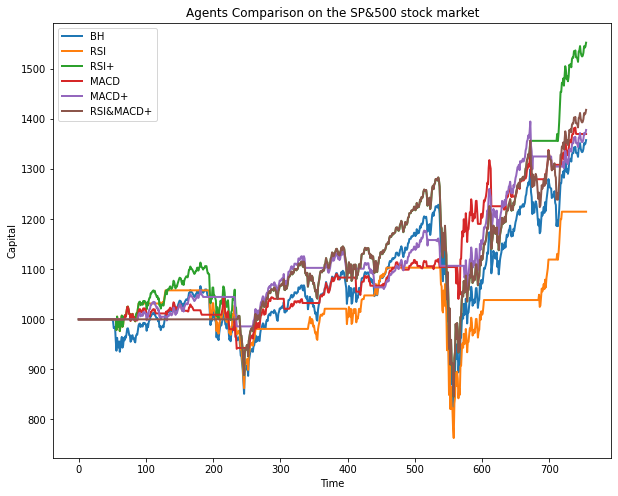

In [13]:
# Comparing our agents on the test environement
test_data = load_data("SPY_test")
all_label = ["BH", "RSI", "RSI+", "MACD", "MACD+", "RSI&MACD+"]
all_env = [TradingEnv(data=test_data, stock_name="SP&500") for i in range(len(all_label))]
all_agent = [BHAgent(), RSIAgent(), best_rsi, MACDAgent(), best_macd, best_mix]
compare(all_agent, all_label, all_env)
    



Great ! we managed to improve our agents. 

### Deep Q-learning Agent
Now, let's try to use the famous Q learning algorithm. Our agent will use a neural network to approximate the q values.

In [14]:
from agents import DQNAgent

dqn_agent = DQNAgent(obs_shape=(50,), n_actions=3, epsilon=0.4, 
                     discount_rate=0.95, batch_size=32, lr=1e-3)



In [ ]:
# traning it on the training environment
# loading the data again with split for validation
training_data, val_data = load_data("SPY_train", split=0.2)
training_env, val_env = TradingEnv(data=training_data), TradingEnv(data=val_data)

# we can increase the number of episodes for better results, but the running time increases accordingly
dqn_agent.fit(env=training_env, val_env=val_env, episodes=200, save_model="new_model.h5")


The code above is very long to run. Fortunately, We can load a previously trained model. Let's load our agent_spy_50.h5 model which is in the /models directory.

In [15]:
dqn_agent = DQNAgent(50, 3, load_model="models/agent_spy_50.h5")

Let's test our agent on the test environement to see how it performs

 Cumulative returns: 0.448529915743653


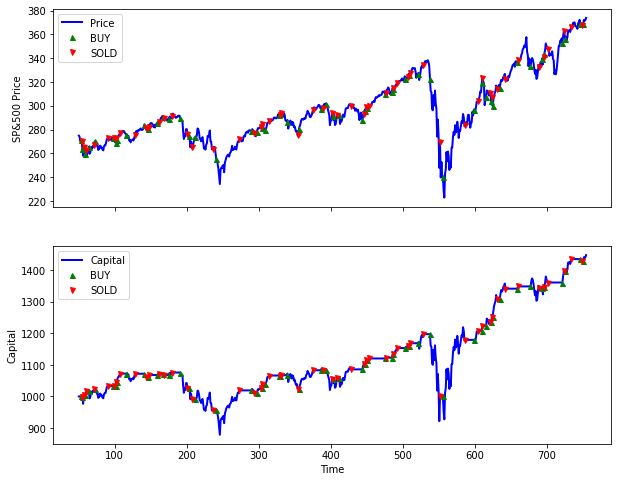

In [16]:
# testing the agent on the test set
trade(dqn_agent, test_env)

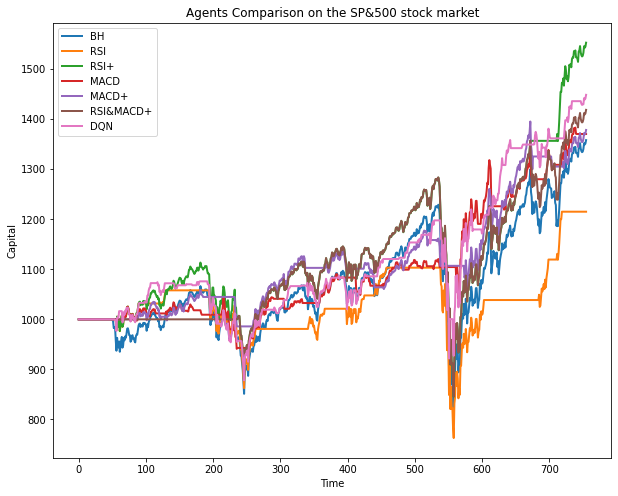

In [17]:
# comparing all agents
test_data = load_data("SPY_test")
all_label = ["BH", "RSI", "RSI+", "MACD", "MACD+", "RSI&MACD+", "DQN"]
all_env = [TradingEnv(data=test_data, stock_name="SP&500") for i in range(len(all_label))]
all_agent = [BHAgent(), RSIAgent(), best_rsi, MACDAgent(), best_macd, best_mix, dqn_agent]
compare(all_agent, all_label, all_env)

That's it ! Now we know how to use AI to improve our trading strategies.
## Thank You !